# Path1 :
To check if user input image is a car or not. Tested against multiple  frameworks to find one with maximum accuracy.

Data0 - Dataset of all images of cars(damaged and undamaged ones)

In [1]:
import os
import h5py
import urllib.request
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
from IPython.display import Image, display, clear_output
from collections import Counter, defaultdict
from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'h5py'

# Using TensorFlow backend.

In [ ]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.utils import get_file
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, History

This code needs a way to translate those numbers back into human-readable labels.

CLASS_INDEX is like a dictionary that will hold this translation.
CLASS_INDEX_PATH tells the code where to find this dictionary (in this case, a file on the internet).
The first line creates an empty dictionary, and the second line tells the code where to find the information to fill it.

In [ ]:
CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

# Loading the pretrained models for image classification
These lines are essentially loading five powerful, pre-trained image classification models that can be used for tasks like identifying objects in images. By using pre-trained weights, you avoid the time-consuming and computationally expensive process of training these models from scratch.

In [ ]:
vgg16 = VGG16(weights='imagenet')
vgg19 = VGG19(weights='imagenet')
resnet = ResNet50(weights='imagenet')
inception = InceptionV3(weights='imagenet')
xception = Xception(weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


prepare_image_224 takes an image path, loads the image, resizes it, converts it to a NumPy array, adds a batch dimension, and applies necessary preprocessing specific to the pre-trained models you're using. This ensures the image is in the correct format for those models to make predictions.

In [ ]:
def prepare_image_224(img_path):
    img = load_img(img_path, target_size=(224,224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

prepare_image_299 takes an image path, loads the image, resizes it to 299x299 pixels, converts it to a NumPy array, adds a batch dimension, applies model-specific preprocessing, and returns the processed image data. This ensures that the image is in the correct format for certain pre-trained models to work with.

In [ ]:
def prepare_image_299(img_path):
    img = load_img(img_path, target_size=(299,299))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

the get_predictions function takes raw model output, uses a pre-defined mapping to convert numerical category IDs into human-readable labels, and then organizes the results into a structured format for easier interpretation.

In [ ]:
def get_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',CLASS_INDEX_PATH,cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results

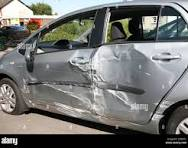

In [ ]:
Image('/content/drive/MyDrive/data1/testimage.jpg')

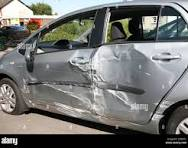

In [ ]:
from IPython.display import Image

# Assuming 'testimage.jpg' is in the current directory
# If it's in a different directory, provide the full path
# Example: image_path = '/path/to/your/image/testimage.jpg'
image_path = '/content/drive/MyDrive/data1/testimage.jpg'

try:
    # Attempt to open and display the image
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: Image file '{image_path}' not found.")

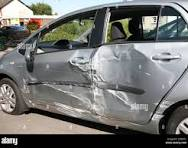

In [ ]:
Image('/content/drive/MyDrive/data1/testimage.jpg')

# Testing with different models

These three lines take your image ('testimage.jpg'), prepare it for the VGG16 model, use the model to predict what's in the image, and then display the top 5 most likely predictions in a way that you can understand.

In [ ]:
y = prepare_image_224('/content/drive/MyDrive/data1/testimage.jpg')
preds = vgg16.predict(y)
print(get_predictions(preds, top=5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
[[('n03770679', 'minivan', 0.65665346), ('n03769881', 'minibus', 0.20157519), ('n04065272', 'recreational_vehicle', 0.045311898), ('n04461696', 'tow_truck', 0.020364176), ('n02814533', 'beach_wagon', 0.019178672)]]


This code snippet takes your image (testimage.jpg), prepares it for the VGG19 model, feeds it to the model to get a prediction, and then prints the top 5 most likely predictions about what is in the image.

In [ ]:
z = prepare_image_224('/content/drive/MyDrive/data1/testimage.jpg')
preds = vgg19.predict(z)
print(get_predictions(preds, top=5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[('n03770679', 'minivan', 0.6650098), ('n03769881', 'minibus', 0.17665325), ('n02930766', 'cab', 0.02921331), ('n02814533', 'beach_wagon', 0.028536012), ('n03930630', 'pickup', 0.012659856)]]


These three lines take your image, prepare it for the ResNet50 model, use the model to make a prediction, and then show you the model's prediction in a way that you can easily understand.

In [ ]:
a = prepare_image_224('/content/drive/MyDrive/data1/testimage.jpg')
preds = resnet.predict(a)
print(get_predictions(preds))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[('n03770679', 'minivan', 0.87229156), ('n03769881', 'minibus', 0.10156498), ('n02814533', 'beach_wagon', 0.0071239113), ('n03796401', 'moving_van', 0.003672122), ('n04065272', 'recreational_vehicle', 0.0031974157)]]


This code snippet takes an image, prepares it for the InceptionV3 model, uses the model to make predictions, and then displays the top 5 most likely categories for the image.

In [ ]:
b = prepare_image_299('/content/drive/MyDrive/data1/testimage.jpg')
preds = inception.predict(b)
print(get_predictions(preds, top=5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[[('n02319095', 'sea_urchin', 0.44759372), ('n01924916', 'flatworm', 0.37450534), ('n04328186', 'stopwatch', 0.17783481), ('n02442845', 'mink', 4.6298803e-05), ('n03873416', 'paddle', 1.7074142e-05)]]


These three lines load an image, feed it to the Xception model for prediction, and then display the model's top 5 guesses about what's in the image

In [ ]:
c = prepare_image_299('/content/drive/MyDrive/data1/testimage.jpg')
preds = xception.predict(c)
print(get_predictions(preds, top=5))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[('n03942813', 'ping-pong_ball', 0.99999106), ('n03814906', 'necklace', 8.947783e-06), ('n03706229', 'magnetic_compass', 3.287661e-08), ('n02769748', 'backpack', 3.147717e-08), ('n03657121', 'lens_cap', 3.962778e-09)]]


# Result: VGG16 shows best accuracy

# Using VGG16 model for Path1

This function aims to analyze a set of images located in a folder named 'data1' and identify the categories of cars present in those images using the VGG16 model.

In [ ]:
def get_car_categories():
    d = defaultdict(float)
    img_list = os.listdir('data1')
    for i, img_path in enumerate(img_list):
        img = prepare_image_224('data1/'+img_path)
        out = vgg16.predict(img)
        preds = get_predictions(out,top=5)
        for pred in preds[0]:
            d[pred[0:2]]+=pred[2]
        if(i%50==0):
            print(i,'/',len(img_list),'complete')
    return Counter(d)

In [ ]:
import os
from collections import defaultdict, Counter
# ... other imports ...

def get_car_categories():
    d = defaultdict(float)
    # Update the path to the correct location of your data directory
    # Use the correct mount point and folder name if using Google Drive
    data_dir = '/content/drive/MyDrive/data1'
    img_list = os.listdir(data_dir)
    for i, img_path in enumerate(img_list):
        img = prepare_image_224(os.path.join(data_dir, img_path)) # Use os.path.join
        out = vgg16.predict(img)
        preds = get_predictions(out, top=5)
        for pred in preds[0]:
            d[pred[0:2]] += pred[2]
        if i % 50 == 0:
            print(i, '/', len(img_list), 'complete')
    return Counter(d)

categ_count = get_car_categories()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0 / 13 complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


 This code saves the categ_count data, which represents the car category analysis results, into a file named vgg16_cat_list.pk. This allows you to preserve and potentially reuse these results without re-running the analysis.

In [ ]:
with open('vgg16_cat_list.pk', 'wb') as f:
    pk.dump(categ_count, f, -1)

Imagine you had a box of Lego bricks that you carefully organized and labeled. You then put the box away for storage. This code is like retrieving that box (vgg16_cat_list.pk), opening it (with open...), and spreading out the Lego bricks and their labels on the floor so you can work with them again (categ_count = pk.load(f)). The categ_count variable now holds the information about the car categories that were previously analyzed and saved.

In [ ]:
with open('vgg16_cat_list.pk', 'rb') as f:
    categ_count = pk.load(f)

Imagine you have a list of all the car categories found in your images, and you want to keep only the 50 most frequent ones. This line of code does exactly that. It takes the categ_count data (which stores the counts of each category), finds the top 50 most common categories, and creates a new list called categ_list containing just those category names.

In [ ]:
categ_list = [k for k, v in categ_count.most_common()[:50]]

# Imagenet Car Categories

This function, get_car_categories, is designed to go through a folder of images (data1) and figure out how many of those images contain cars based on a predefined list of car categories (categ_list). It also identifies images that are consistently misclassified.

In [ ]:
def get_car_categories(categ_list):
    img_list = os.listdir('data1')
    n = 0
    bad_list = []
    for i, img_path in enumerate(img_list):
        img = prepare_image_224('data1/'+img_path)
        out = vgg16.predict(img)
        preds = get_predictions(out, top=5)
        for pred in preds[0]:
            if pred[0:2] in categ_list:
                n+=1
                break
            else:
                pass
            bad_list.append(img_path)
        if i%100 == 0:
            print(i,'/',len(img_list), 'complete')
    bad_list = [k for k, v in Counter(bad_list).items() if v == 5]
    return n, bad_list

In [ ]:
import os
from collections import defaultdict, Counter
# ... other imports ...

def get_car_categories(categ_list, data_dir):  # Add data_dir as an argument
    d = defaultdict(float)
    # Update the path to the correct location of your data directory
    # Use the correct mount point and folder name if using Google Drive
    # data_dir = '/content/drive/MyDrive/data1'  # Assuming your data is in 'data1' in your Google Drive (remove this as data_dir is passed now)
    img_list = os.listdir(data_dir)
    for i, img_path in enumerate(img_list):
        img = prepare_image_224(os.path.join(data_dir, img_path)) # Use os.path.join
        out = vgg16.predict(img)
        preds = get_predictions(out, top=5)
        for pred in preds[0]:
            d[pred[0:2]] += pred[2]
        if i % 50 == 0:
            print(i, '/', len(img_list), 'complete')
    return Counter(d)

# Assuming your data is in 'data1' in your Google Drive
# Change this path if your data is located elsewhere
data_dir = '/content/drive/MyDrive/data1'
# num, bad_list = get_car_categories(categ_list, data_dir)  # Pass the data_dir to the function
#  The get_car_categories function now returns a Counter object (a dictionary with counts of car categories).
# It seems that you were using it previously to get the total number of car images and a list of misclassified images.
car_category_counts = get_car_categories(categ_list, data_dir)

# To get the total number of car images, you might use the car_category_counts:
# num = sum(car_category_counts.values())

# To get the misclassified images (or any specific behavior from the original code),
# you might need to adjust your logic based on what exactly you want to do with it.

# Example: You can iterate over car_category_counts
# to print the categories and their counts:
for category, count in car_category_counts.items():
    print(f"Category: {category}, Count: {count}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0 / 13 complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
Category: ('n03770679', 'minivan'), Count: 1.9864439517259598
Category: ('n03769881', 'minibus'), Count: 0.20157518982887268
Category: ('n04065272', 'recreational_vehicle'), Count: 0.04531189799308777
Category: ('n04461696', 'tow_truck'), Count: 0.48144881799817085
Category: ('n02814533', 'beach_wagon'), Count: 0.32936215214431286
Category: ('n03538406', 'horse_cart'), Count: 0.17612005770206451
Category: ('n03478589', 'half_track'), Count: 0.7885277941823006
Category: ('n03763968'

# Path 1

The path1 function acts as a gatekeeper. It ensures that only images identified as cars are passed on to the next stage of analysis. If the image is not a car, the function alerts the user and prevents the program from proceeding further.

In [ ]:
def path1(img_path, categ_list):
    urllib.request.urlretrieve(img_path, 'image.jpg')
    img = prepare_image_224('image.jpg')
    out = vgg16.predict(img)
    preds = get_predictions(out, top=5)
    print("Ensuring entered picture is a car...")
    for pred in preds[0]:
        if pred[0:2] in categ_list:
            print(pred[0:2])
            return "Successful. Proceeding to damage assessment..."
    return "The entered image is a not a car. Please try again. Consider a different angle or lighting."

The path1 function to analyze the image located at this URL and tell me if it's a car, using this pre-defined list of car categories (categ_list) to help you decide."

The path1 function will then download the image, process it, and use the VGG16 model to predict if the image contains a car. If it finds a car, it prints a confirmation message to the console. If not, it prints a message saying it doesn't think the image is of a car.

In [ ]:
path1('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSkdtg7mOqFxSB3yXmk__oqq_P7i9Ed-80FfyLHldYZfs3OncHSmFdqrkc&s', categ_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
Ensuring entered picture is a car...
('n04285008', 'sports_car')


'Successful. Proceeding to damage assessment...'

In [ ]:
path1('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIALAAvAMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAAFBgMEBwIBAAj/xABBEAACAQIEBAQCCAQFAwQDAAABAgMEEQAFEiEGEzFBIlFhcRSBByMyQpGhsfAVUsHhJGJy0fEWM5I0gqLSQ4Oj/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAIhEAAgICAwADAQEBAAAAAAAAAAECERIhAzFBBFFhIkIy/9oADAMBAAIRAxEAPwDb/F6Y+s382OsfYAOLH+Y/hj3QP83/AJHHWPCcAHPKj/kX8MfaQOgHyxxLMsSgm5v0Ci5OAuf5hLFltXIs60wjiL7WLkBSTcdvyw6Au53m1Nk2XTV1XraOJSxSNbk+n/OEnMPpJoqGfRX1B5urakpIdTquxu7E2GxBNjf0xC8C1XD8TtUVtauY10MWiRywWGM6yFAG32LX9hivw7wvpizeoz2Cnq2zKfmSLY6lAkLBbi3bTcdNsWor0Q78P5xlOdU0lbl2oxqbGSVCBf36fIHFJJ3nzCVhJZQWuxFtXlbfb+2Pqc0tDRrCYooaePZI0ACIPLyAxEtekUsyrIrc2HxLCpkZRvp9iRubi248Xcw36VRIKqSmpylOI1W1lS9zf18uvbAOu43yXLglLPVrU1AP10EEZkdm7HbYbkdfPCvm0QNHJUcQ5wgjJ2gSVU9wEU7/ADLdtsCKLPUiUpwrw6ayToJjC3Lj9bAC+3b9cJW+gY3vxrnWeymDI8stoksdNpGWw++/2UI69ThI4zzmqIVa/OaSpnXdqalYuVIOwJC6b3t+HXDJTcC8Y8S5eP43nMWX0DL9XRwBQtv9EdlI9ycTcNfRpT0ud1gR4qmWjEbIlXCjwyK6/eCtfqGANvu99xjRQXrIcl0DajLpcr4IaBpr1Usi1GsKCBfRpAFrfZIHucKecNE2VUNRG0ZbcTOUILNtYFgP9WNO4ykkGV/VBFRaeNo33Kp9g2Ww67bW3xkXEdPIKPLagACF42jHldWNr+pv+WEr8HIrmdGbkzBli66lsT/xixHlkkkXxFHJFUR9wrjUPQj+nXpgCHKOrC1j90nY+3bFilqpEm51PKaebzVjgtoQUp3MZKuALdQeuJZYtJV422PUDEH8XM05fM6eOZitmKeD52Hf2xY0wSrzKCouB1il6g+V/wDfCGVagvIn169PsnuvzxbyTiCqyaqE1NO8M4FxNH5eTr3Ht+GKbz+IpIhBPXFGU2aw6dcAdn6F4R+kWjzSmjjzh46aoY6VlW5ik9b/AHfn+WHsOpAZSCp3BG4OPyTldaaWpuTpDbMeoPuO/vh4yrifM8to0pkzKtjQbqIBrQjzBvt7YLoh8Z+h8fYiklWIapXUD9cQSSyyPoiYRDTfUwucSaHVVXU9IUE0ljIbIq7lvYYo5jnEVHEJKiQQDY6DYu1+1ux/e+EPgqprsx4i4kzQzyNSxM1PEGY3vq2I9bKPxxbrsodsxSszWsWCl03WNrtJIwv9lBctt5DFV0Ad/i7TRsYAUA26+I/v0wHzWmqX4czaefwa6d0iLGwJbb547mzinpMs51CsNGgfRz6/SWPX7KX69LdTvuvbCnmnEEj8yrhhrq2OI6pMxqoGZIbDqiCwX/8An7nDCwjmOaDI7QUq86alEywoSQvidgpPysR+OPeH82r88hnUVESPAyiad20xKhvbv1O4t07nsMAeI6xIMpybMg9JX1UsqxDwB0KWBuFba9zbe+9/bC1xFlnEVW9TV11PL8OXaXRr1BR0F1FgAFCgtbsMS+wH3NeJuH8tjaV6r+LGJgtqeYCINbsAbkbdjbCdxNxfmHEUcOX09IaOmdwESGV0v3sVGxB363xDR0dNEsd8mzQhgHglhphLZRfc2Yg9bWt5Y5izaOizqinWkRjSyFmMY0FyAwF1Isv2jt6YaVy2JzK2e5LTx04rkrPiGEd5YZF0MjXPhXc3A2t+nbDDmGWHIeHVnqq7MaSaNQsNCxcoW6gBwdFuu3a1t8O3FvLzf6PKurmy8GcUyssk7Rs6XYfZKlj37kY4rODMnyamm154sEs8brHFU6XjN1tZU6n8zbGv8kptmXpxRXcM5vKnD2bST0aPePUpCsNr3X8R7W6YO5dxnXcQ8QSjibN5sppniClcuiAWwJ2ZrlreI+eBuX/R7nmcylaOi5MImdWeYaU2P2gGN/IdPLFh/ow4ogeqXkRR0cYZjM06lGTrcC977Ylx9HZoPE6pLRRUmXj6sxwpE4PVbJpPp1G+FfJ67I4OHaaKro3fMWi+0WWxW52KuGDG9+q38jhkz0PR8NRxs3LqYI6X2VlWP/bCFSw1KZVSZpTCinliiqY1+LjaSRdDiQcsKQQxufEBcW8sRH0p+FWThmXPs2lioMuhpgsKu7LeBEBJAJDn0PS3Q4DZ9wVmeVDWsJng0hjPARIi+jFb6T7/ACxouRT5rJUtV5VxDT0c1ZR07SjNgJHsC/LAJG1g3e533JxV4h4ozKSvmyNpMwqq+IsZo8tQza9r3UsLILHchW+WG3S6BbMjiEqNy9GpWH2ewPbHa2szq5jkTsdsMOTUcWZZmYhDyqYSEukkh1IB2LWH9PlipnmQzU+aTwxIWj1nklbkMt2t4rWvYeeJsKKcNcyKFq4Q6A/iPfFqviyyfTNlMs+/26ecC6H0YHce4BwJdXpg2si4FjG3Ufv0x8hV2XlEq56KCBh2IkKFSLjxDp6fPBihzKaGmVLqbee+KmXTRCr5eZU7yw/ZOhtDg9v+PLFwUNNKWalqlWK9lEzKHHvvhOh2z9RiKMTHnPzpOoB30j27Yp5uywUFTKzqJXjKoo2J+XnhRzT6Q8rgzBqSGtpkkYFdSsWVDc/aYA+XYE+mKtNnOVZlPLUUuePWVsMMjGFIfq1FtiSwvcW6g+48s1FvZTK3BIqMtymbL6X4l8ymlLytTqrBL2AG62uQBuxsOxxLmAfLxJJmNR8GzaQdI+JqJ0INzdr6bWO5DDyOK3DnDtXluTZdmVJUzA1VIjSJQu6CV3FyXYl7v6hV74ES5Bna/F1lEsk9MWZy1YnMcmwBJcC5tbqV/DHRP8M8j6pzSjhrqqpoaIVDyKCs2aa52jULZrKbXBJuBuOvawxzltTX5jVl82naeliKEQ1CGJN918AGncgdr7ix3wPgNS6R09XlKurltD8wIRYdg1ttvb1xaTN6B4pB8PMZGYAtJEriO1rBTcAA26+g64yutsVNlnjgQJmHDiTQf4elieV0iGzt4NI/EH88DqviStroquSskq4KWd3UqsWuBFHYlbHe1r3/AC6X+L3tmHDbSSK0L0oOi191VWY6vvdVsP8AfA7KKaWeinJr3hiWeSwWME7m9+oI+X5YiUn2afhQr4xIzy5W8V5FKt8DMbuOm6DffbzxFlFRTZZKXrMrizFpFGk1crBVa+5A+8fn54lmy+hu0rVcHhXZhKFMhsbaTe9ye344vDh/PZhSzUK1LAKv/rWXSoYWG5tt8z1vilJBiMD8QRV/DmYUcvMhqDl8jimhp40pwNB9S/Xp4u3Y9EbJckz3nrJkYqZKgKVPwTkSRAG1mYWt+OGmDIhQ5fnFVW5jQTVgopENPRSatN7BiwA0g2t72vgbSZ9m2TRg5TUzGCMapqd28JIPTr0I6mwsfMYeabFVBWgzH6RuH6pXlpq2pVrs8VTFzVfoD4hc/njQspWfiHLFr8yzqohgdTzKeKIU4Tazq2q5IG+9+3XC5DnWcZ1FPV5VmdNSQCFZKeNIC8xXfXGdRI1X07+ViNjjnOKFM6zGfMK7M61YHrFofhI3PL5JUamt/mVre5wKdvQ3Glsv8VoP4HURUpMirFGY3AILKFG9/YH8MKXDtfJTUdOscLS1UZraiDk2ZNCg6g+9wrXA238WHPP0po8k0hdP1MaIWYWQaALH5YzbKcygyvMqWnVUOlqyCRy1tSSKR+RW+BPQNHMhfM4qAJFDHUV0iLBNYloY4YlSQkLa6O3Ymw0k9cB3zSmy3PZa41dTUVSgRSBIURXAABS5a5HhHQDDT9H0cEdFm9fUsrzlTTUUAuZCp1M4AHTdv1xnufRGKvmEtw76JGBFiNaq2n38VvlgAYsuzlKuuqaqgy1KUpE7PDHIzvItr6izfy2A8zqOK2Y5guZOnjWONFFowbnrfpc+eFdJRHIW0ErfdS1r4dOCUoc4zVKOvkgpqVYZJJJn+4APMkDA9Auxf+Cab4mSMpIkS6m19QvnfFWvonpakwsgURtp8Nrix33xqC5bldYKin4cyyqqqBLpU5pNIAOmyooAB3Plf9cXc04cybJcphz6okjeunqaRw0riyR601eHv4QxJ36/PCT2OjIzF3DsNhuzX+eOg9SotqB9xf8AXD39J9BkjyrmeSzo7ytrnip1Jjv/ADqwFgfMdDY+WEfTK28RDL56TgEabkXA2U5t/h6hxTU8OvlszEMS5Fu41fPBqj4HyLIKuqalqlmnaklR0u912S56kDqPLqPkktm+e1tO70FfJTJBEBLGroHt3bYAjpfFrJqbNMryrPK6sacqtD4WmMhVz3AuBb7IGxJ2Hpim/BJFOv4grckrMugyWnWmK0kekFmJcnUL7m97jtjnM/pE4jTR8LV1VOTfWGC2Pqg0/wC/XALig1/xsU2YpDHU6UiAp2EoCDdbsGILW3O/4Yr0NBV59JJJzGkaKwZnOo/Ifvth5MTSQ0ZVxhScl6rNGeoqowAxn0kvuT4VOx/488SZfn2U1mplzCnyRFGymKSUq3m1tgPa/XCJm9F/Daw07sHAVW1AW6jcdSNjcdceVFCaWqaGTTKE08wr0W4BKn1BNj64TVjNf4vp6GtrOHqOoq2jiMTkzpC3TQgD27C/sBbe2FyTKjTZLPOlZVxuczNLCwK8uo7bDs217klfbBvjUM2YcPKbkmifSI92udFh6/awBy01MtLTw1aoKOnrJpV1ycs80qFVbdbBrnoMSP0Z8mMEMFZBSVVNSVUEXhWnovrmLAEEE6tRuWHQAbbYL5HHlRoGrMxqM3bMtBVxVtN1Iv4UsFIv3tbCbw4hyqB4/gDWTEuZy8hXQdugBFyR6nBHiXLmn0GkosrpoGQNE8qO0z7arkBrL36kn+kyURuVFanaJcsqqPnQ896QK0aS63LcxFLXvcdfz+WIaRaHLaqacrV1Eqg8yGGxUqTZR02+Y3scRZVCY+c5VbpBGmiBNKG9RGCT1JPh88fV8KJMTo1StGgW58L6WPhZbgHY7eu2FSsXhYWqqsiy6kaGARSwIFcNpAezMUa3XVp29QTfbE2c8T5guU1vwVNRQGaJatJ6eZpJFfnIALk7faN/YYX4xJeqMMEQjMpYaQf5m6C2wsfLsMetFWEVIgeXSIlHKKEl7yxsAPctf5Ytdg2aRmrzy5U0zMWeOkRwdiSQgJucJ2RZbCM8y+skRJROzyMlRGGsQNS9LWFjf2/DDszR/wANzCWNAI1pmYxyb3Xl9PyGMuy+Caoz8LCTCyFiUdr2BXe/sML/ACwkPfDrSrlVLBMymAXYx8kLqDEsCD1I3t+OEnjzIJZ89qpKBoDEsKSGNSbgC1/c74faKSCOjy5C+hjlkGkkbnw3G/zwqVuS0+WZnVKapuVUQNcM1luSLC4sB174jKpMkz6nyfM5Kj/DUM87gg3ij5gW/QmwsPng9R5FmskgSTKOQwYLeVBGDfba53/DDFl/EFDlGa1UgnhWnkWNN21g6VttpvqHXpjqq4hr6+RqfLaaq+tN9VUpWNV6/Z+0QBv5dycJzk9UTkySgp8zyihSTMZaanjhlbd32HkdIso8zY9yRgpleWpUQrWU8CiR5OYsklPoM5Yt0vew32uT0BtaxwJocjmqaWOfM6l6vmX0IF0QxnsQo3LW74tR5vmcTfCQqn/dXZWbVFpO+mxtuOt+344SmVkH5uE8segp6esieVyEDRNKzHWSLkt577nobYoUfCGUCL/FUpVzpOnmyG11G2zed8B6zOK+HMcxo+c+pKstraRi6BbgKDe1gL9uuLCcSvGN0nYtuQI2Ok9Lbe2KcsWKytUUyUWXrHTyiCSClHxcWlggLS8sKSxIJPisygDwXsb2DPxR8InCeZyQyz1FRMipOssrSEB5AoUAnSu9xZbDCrnUdPToXp6eJKiao16lJk0hRe5LXPa9m8vTElXVPLwFngNyRU00QF9l0yqTb5k+mKTy2WmEq+jSsyuuXM6ACpnmimkpnqY0Wjo4XBC3v1tqvbu/phPyaGpyd6x4KfVTM+iJpZAvfw3Av1sMXcp+JiNdUBDMEp9DCRrAK1hb97YrvWNT1cMdRCloCwXYHtbr1P8AxhrsnKyhnNKjZk02YVFp44/BEEYFl3ItcWtc2vf+toOHcrjrOYssxE9Q5RCXFt7G7Dri5xTk6UqQV9NJqhdY7QsS4UlSdj0tte2KGVSUAqYXeGRZxMJEZD4QBbb0Gxxa2A38X5nFmeY5fCIamF6KJo9rAsLJZgwJsDa9+o8u2B+T0dG1LUzzLfVMV5cktlupuB0ufXffFbiOUippJVqPh5GooS2kX0+HSRv16fnirHNWU8C1dP8AA1PPkkDIyEuum29x/qG4/wCFWirHKiSurxPz4o0VCzPrI0l9trX6WF7+npbE/FBjp5qFmkaNoYlsqAEEdxvsPxuevbAKDPaqKsnpKnLa2aaaQ/8ApZFlUkrvoGlffvj2q4nylRD8TDUCrp4eVIaqDTdgWO43t1HfoLdBjFxaE1bLlApeObl6xHogRVksSSaiM32/piGanhr88o4JHZI5n0NIp6eI7WP73xNwpV0+YU+cVoj0PEYpRy+9m19f/aOlu+DkGUUEuesJEY3m0Kp2tswOnfrt1w2mNdClVy0kOYZjBJIKYJUSIhCdQHI6d+1h79ceS5isr5k8UjIRFriuSotrUoO3YDpg7UcP05zdkZ6mVTWssocL43MiC/Tyc/hijl2QVud5s1IrGBEa/OJFlABtsB52+WL8FjbH4UyzZBU6/syRqhK+VgCL4yLL0abP6dECqktToNlF1BGnYY2esgMXCWYGN9OmGRFYdrCwb8sZRk9KarPkZCwWnrEqGJIbwK6M24H8oO3ngXTKkt6DtVUJEtEvM+rgy2EtrA0aVjudzbcbfjgXWUtB/EaaAozSCmeWaoMYHOkkZX1jckABhs3QADHubUj1sdNTU8UhY5TC0yhyAQUBY2t3At17D3wVyebLM6jp1nkeCspJDE4tYtCxvZj/AD2vv6Ee0yh20SvopUkGXx1jypJBLLdnMqHwDxaj18hc2HTBPI8+oDR1LtGiwVkLiKYqDIFYlWVzfzF7dN+9sBOLMqTKswfL6SdCczJWnkUFgkNrnbsRsvsG6dh+XTRZVUDLbCWWN3hU7GzEWLDr1Nt8PjT7BxrQ10M9JT5XKrPdqSC6yFwNJMqKDcDuGI3/ACwvT5k8eYPUIpZpG1ozsSD+H9fL0xo+W/R/EmUznMa2dZquJRKsYUBAHDADbfoBvjmbgfIX8U81Q7DqS4W/ytjn5JQ43THDjcjPuJJlGcV/1UCyfFyqdItqUM259b74IUVVVpThIpqeAKSCmnUb+ZIBH4emG+oy3gw1k9XWPF8RMxlYSVRA1MbnuPPBJUyiNFWCOmVNI21f3xnyc0f00Xx5MQX4aq6ueeWLJq+DVHJ9U4Ox5Z0kG5HXbqDizHwdnk/CE9GlG4qpatJQjkDZdG1+g6d7dPXGgUqRzrAyVtRKdF5HkuQT0sAAO9/a2DtAVcSspuNYsbWv4Fx2RraRDhitmV5JwBxBDS1kdQkMZnp2jAMn3iym5t2sD88XKf6J5HUmtzG8hNzoTYnv1xqlhj6wxZJlGf8A0ZrLDFNVZ1VPFDGqcqCMBdri9txffywEXgvIaSpDkVkjxuDonlA1WI7AC+NxKKwswBt54D5zDU6qcUBQSPKdWseEDSb3A64TbGjA/pREacU/DgMIxErS2NiSbj9FG2F+ny9lmgj5lHeSJ5xzXB2XVdGIB0swTYEb3B2vg59KyleNq9ZGNjpAP5YV8zeT4yRLnlhtQXsrWH9APww49JB6E6eGCliLV1ZFSy6tQihbW1vIhTsfc++Grg3hunz9ZJaLN46VUOpUlkWWUHoSYt/IdTfCHTVcUlTHFUM4pFAJAsxB9L9LnDCv/Sit9VVzKenMNMdV/Pwgbb4XI21V0OLNVosjyXh+jiiSsiqFqKiNKxiI1Rh4juoG3l1xTyXM6eWTN6eoqokrRL/g5DGutRd7lRbewPfzxnNNVRnhvNKSGoWoo1qacgxxtqLNrG4Y3+6O+2PcxkqVkqJ6dCJDEw+zupZlJ37bav74zUJNVdl2htfiaOmnWjbRUvDKWmrxFYR3a630qbtZew+6PLHUWe8P0GWyQUEtYZ5A009XCHLgNtrtcAm5Xv3wmZFmMlEGkmpxUUqeOUWBa4N1Ynfe5Pn2wfpcxyXMXnXLqekDrDqXmxlEKDfSznoAQL7Y0lBMlSTNWzfQnBlcviAaCTe2/Q+eMo4RkMlaGUpFy6pm1Brk3TwoR1N9P5k9N8aVxTmUBy2oouYt/hZbgt1YiwGMpyrm0eatUmCWVY5CRsQGLKBcbHtftgitCYx5Y6JPBGZkjqRQUraVH2gYlF/a4Nuv+4HPKOalziGqytSVlKpPHq8VyQNR899/9sDM3zuUZjS1EVNJHLTQR07O4I5ulAu+2wNrgdsWazOY6vKiKaQGoMZQ67arnvf2BA9cUSCcxzYzZ49cszycj6umJY3KrcFvS+5+fpg59GmWf9QcVNV18fNpKRGmmdgTdr+Gw7kk9r/phPSmktpWCVja+rTYdu/TGjfRdXtknxMU9JNItSgM++gJY+EhvOx8x28sAGuUtDU6i6yzIjCx+Jfmuw9vsr77+wxnP0k0le+fculmmWkSNC+wCC97m/S+3T8Bh1pc5yCSxqZZEBbQRWSyOobyOolR6b3xl/0oQPW8UcrI0mlpliRiYYgItW5IVxt0P64dJ3Y4txB+W667LaaKWcxU5qjG1UoZpCdBOyja23mevTFmio8npYjHXUtTI2olHaodNS+3vfA2KpfK8uWmeaKKVJ2mUs4lYHTYAgHy364FV7Q19QZ6muqpnI2K0oAA8h4v3fBSYmzdeGljejZNLMIHKwyfzLfa3n1/LDRlotE5833+QA/pjLOHcynyvPNM8kjRk6OnhVSP6E40iDMaekymqrKiQLDTtO0pv0Cs1/yGObiSTbR2fKy1JrsocY8bZTwlAhr5GlqZP+3TQi7t6+g9cB+FPpVyTiHMEoGWSiqnNkWciznyBHf0NsZTSU78XZtWcScQljSySnlQhiNYB2QeSL026/jhtos1iokSCljjp4QLLEkQC/LHQjko2OaRkiZ1UsQNlHfFWjkeqbmywNFy2IQMCCdhvuPcfLFHhbNf4lQhWYc2PYjuR5/pgyWAYKSLm+3798S1sPD82fSzLo49qdr7gH/ybChWVLPWMpA1DweWxAHXphp+lRr8d19t7SAf/In+uFGoYiqaRLB0cFSB0IxS6JC+bZhUUxhoKmlo1kprWl5YbmKfF4vPqMHeB4Mnrq+anr6CKpjMWqPY7MCL9PfCZU1k1ZVST1Ta2ktrKgDoLDYegGCeVU6RwyTzORTwi6t/OT0UD3tf3tsd8O/oY88Y1GUZRSfAZNRRRVU7pIeSliukNa/mRqJv2uLdQcLOZupya4kYlpKYlzsHurfa+YG3a2JY6aVIqXPM0DRRS61M8iHQLAnSvntfp1JPngrw9nmW5ZSVeYVFO1RRSUYhRWQD7d03G9u477djsMT9jsW6fIMzjhR5zyqeYakmuGVl3+yAbsdugHa+wF8TupMMtJBTS09ECOYQ32iOhkN+pN7DoN9upxFW5tSmsAo8wHwYjMSU0MTxctDa4F+xJubm5tvfBJsw5OW0FJKrmN35swJALGwAGw7XNh/mOLsk0HNEkkNVHDFHcyEG4tfcjAWryuuqqamERFp1Om8g0x2G4Plp7/3F2eeCRMyrNW6iXWNvMnFDNKyOOJoJy8ISxjlgYKykdD6/27451OpNG+NpMRcsy+ePi3+HzVWvkSEytBKGQqOu/cXsD8/bB/iUrPHJDoPhItIBbURbcHFaBailzGSqhXL6h731yRaGPzU2vt5Y9z2qzalyyXMaqjoAioDpjnZmsxABG1u+Lu2QlSEFieY4uLobHbrvgxQGZ1cQ2so3Ont5flgfw/lc/EVdWR0siRNBRyVb3ubhLbDzJuMWKLOKjL1jqmi5zVCuGRR4lt0B/X+nnojMvHNquSZJnqHMkGrQzgFt+o3PfFmpzesmf4uus0zAGPUoKW9rYX5KqSC7PA0YqSLK/a1j1I9d8eDNGdVhKlxG+21zt22/e2GAwSUNRmNBNWv8PGsH/cAFm326W6fvfsKEuYLsJZQOwDWA9gemIn4nq1hmpUjblzC7+ZBsetr9h8scy5rVVjc1aVz2J19T+GHaFsdaatSoDtqUlzq1XFvX9fywx8VZtK/0VCKN1WrzOuNIP9TTMSPmo/PGdSVVNr1imW6tYsBYj5jFqnqubNk9IQ5R6p6hVZyQCqMQd+5v1xzccMNfZ6/zeZc8ajX8hHMGSlgp6GhWRki0xxpGviax07D+Yk292JOGnhngaoFUgznO/g6iSIyrllCyK4UbXZzfX1F+ov3tgRw85p88nzL4M1q5fStOYlkCsOgZgT1IVmNvQYB5VJnJc5tU1kmX0EIaKI8xgYUfbTHe9hvsb2vY741R5jNKySjzPJ61HzJqf62q5KfCuRqUmw1+EWYAkkDba+HgQwzsJFMupSQG1t52Pf0xmOZVqVbZDXLPNM8b8uVhtqqIxp37EkN+QtjQ6bNaKNlp+Y6uWY6WjYd7+Xrgk6aQY6tH51+kg2+kHNE7LUqv/wARhSlf66Xb7xw0/SG6ycd5gxNtUsZ+egHEFLQ5DLRRAkyVkilpSZjZSe1h0+eGuiQBSRNV1McEf3urdAo7n9/ri7UVkKTwRx6xRU7CxQgMTfdvK/X+3TBWajpIJ4aGjikR6kePT43I3sqjqCSPy9AcTLVUmQ8yPLtJqXQpNOsinl36qu9idhc2tttc7hiCPEsFNk+QNTa/j40rFkIeW+qRozu3pbSdOxNtwB1p5LO1fS0Pxt5OZJC0mpRbSs5U7dLANsOnht0wMhjhqeG2WsrPhlkzIsZ3VpN+Wp7bm98EMtVFopI6HXW08EVRDzYEZSbg2ezbru2q22El2NsN8TZHklXn1JV0MU0NMLXi+DMYeS11AOkXU2674sT5TTyZTSs0glao0y80bXe9z8r7YB0PEU2TUdEtQZKmpdjPL8U7NYkAL1O9gqn39ha3lE38TmnlMpUK/PihUeD7f1lvTe//ALh5YEBqxGqaVXVm1TlAQOm53PpijU8Pw1NXKrTG1iPLb3w1UcCvrutmLN+uMmzKprq3ifPxNUVhp6eYRU0cExjUEavLqbAfjjlismzdugo2Tw0SlJpdUf3W2vb9jrilUw5c0E9NJVwTLImmSOQlSb7jY9gRhFr6nMdN/wCKVewJVBIWAW3nYbb4m4Z4bq+JJJo0zaemeJQSDAX1dtrEenXz743jGjNyTC68NSqwlyeOMF1KM0RsSp6g+Y6dcSfw3MC4hmh06tgvQbX2wQyvKs8yWmEEk7kBVaJi2l2JIBWwJsPF13t+nVfxJnuh3hoaJLIWZ+aW2AY3tt5H5jFVXRIsZjkdTUpy5NMcq3MbEX39T6jb3xVy+izDKakVSgrLa40na35YPS5pWwcuPMyjTqSJgkdha5AsR7Ykihnq0qRDIpdksgb5f3/HBn9jUbBOZrBmkq1eqNDYK6ttsN7nyxJFU0USBFldgO6Lt+e+A4hh1MXk0HcML9dr+fni/Tx0HKH1yr6aRiJ8iXhpGF+lL4+jrLLFMqFzur7fni2JY4M3yTxjSHMd736jT/XC3PlzqdBUX7i97friMQVFOUk1WKXZTe9iO+Lw2n9DXMsZLHs1XL0VayaGWueghq4WjaZQCPDYlWBBupCsOoO4+fFTk9bX8PDKEzAmmmeKValYBoYNuqoAbkBVuWO+4HoPstnTNKCCeM6WcB1tsUcG5HuGH5DBXMpa40c5ioIq9Zabky0zSlE8JurBOgYG/QqDt5DC/GZ1ZBmtbU0ma8OZFPSpC9HVIztGwOpeYFjN/VdrH9MO9aZFRnjkIKAt19PLGV8L5bmebcT0+bZ0ro6Tq5aU+J2BFtvIWH4Dp31KpsYph4iSjG/bp+/zx5Pz5yU44s7vjJYuzA+Mgf8AquskZtRBjN//ANSYpZbEqIa2qUtT05Ft763tcLb0uCf74OZ9lyzcYVMdSZOXPJpQR2v4QFF79rje3bADOKmFmjpaQf4aHwrfYk36nz8r/wBseuv+Tzn2cfxOoj5xR2ElR/3WB6j+Uf5e3ttik0nRrKLdLKARjkoSLtdAdrNcX9tsemJiiuD18h+74oQzZQuvIUUNHrjr5JAX8QuI4rbYv8L1FTldShdInaaqF2YE2va5GBkLSUvC0ckTvG5r5bMq3/8AxxefY3Hzxayijnzenmk5sSNCVVjKSBc6txa57emBAD6xg9Qs9RE1W72c8xiBc/6SD59cMXAReqz6pCRqkRpnUJ00jboPnjhuHMthsZ6yaXVYgwoEBv6k38/u9vW+LfDwoaLNG/h9OEZYJBz3fU3T5D8sDBG6mQwDmCKR1bUbxgG3l3/pjG6+pjoc4ztaqSKllkq5GVZbIWuAQ3metvlhmlz7iKItFFmeXPH00yUb3v5XDWwDzupzuuUa6jKyB21SL+WkjGEVibNWIdVPFFTSwxVS6SwKgPe41bj9Pwwf+jbPslyPM6ibN4nk5iBI5YyPD3PcddvwwNroc0gLNJV0CL5LK/8A9MCPiKzU3+JjJ/mXUf31xqmzM1nPuNMpjdKjIq1WAXl1MEzlWBBFr6gdW1+h8/PCPPxZHmeYyrNAIlnjs0jMQCNLjawO/iwrqJeWT9W7FjqkI3OOGaa6rJMwHkptbFCaGKsqo6/NHKODT3Z9VrEqOm3b++LuX5nyqe4ZEct1Y9u+FmnMP2PE4ta2o74tSyW0xU6BG+8R3xDjfZUW1pFarjkeeQqkjnVc+EgH13ttjj4SofxJGijyMoxE+amKcr4jbwn8d8cHNKba0VRsN7264rQqDsqKWWJArPc91dbD1BJ7HFinoROgiemfmHsqmwHuf3/Vyyqkgoq3nxxc8BT4luO/ou9sWYSxmAQoIRs88akMRbYA3t+RxZmkAsoyTM6KZkhgHwxP2WkUsG89ie37vgg9eKZuXNJpcG+mQdRg0tayJN8LAZOU1g7QnxHYbbdb+d7b9cDqqpdlvmrU+tthHIhCi/S+rrjNxNExezfiVaf6wTGN0N1Ntx7DAyl+lDOYCyzpT1MbCwLDS4H+of7YbY8n4eqqrkfwyhcsusM0GgkehsPyx6vCOQ1ZdUyNxY6VaHUbtt91TfvuenrjOfFGW2jSPJOPTFXK8/4fr35udQGKrYMBKxkt4vVLgbk7lTbBFKDhuuo2psvo8t1XvztTuXbpuQxIFuwtvi9PwBlUbqDS1am9tLBxv5dPTFWs4ZybLjHNBl1XUW8QMVSAetwR4gb+2NMkZ0c0vBWTyRmaVyXSQlo4dwVt0A1XG/z/AKQZxklGr0g4fpKeApEOc0xkZSxJ3Fwb7bkE7bYrZtxTSNWSSDKKxZDtpmqzqWwAvutwcUoeOapHkWdZdBIIGsSG46dbE298UqYgjWZZVQ5HSwza551mmqJNaALciNdIsemxIv8AhhpyyndeHpKGVVLRwmRZI4yBquGtsgAsoG1zcb9zYFBxlQ5nGi1M8UUka2UfZCn2bY/+WCuX5jUpJCIcwgqKZpQVpZIxEtyCpOoAjcEbah3wUAuVbF5NLBizbsv+2JqSH4ZmlaO2oOqPquL/ANdgcQwZZnldWUxcQwU0jBDUKw0qh+9fxdjfphnly6ioskqTSPWVektGa2pWwbfooHhXpbzwnbA9dWDsxxRzGOSK2mo0BlU3amuBcdL6t7fLBSTSUNz16YWOK8zqLU8FPUNEIxYsbFd9Ppt9k4lfpTf0UK+OL4dzNWJfz5B1D5FsL7x0ojIFRJI5b7qBRp+Z64izGoq3Zo6iYOFPa2+KwRPvOxxZGydyqI4V5AOuo2xFTwkq7CQy3+8w/wB8S0s0MaPqINztcX2x0cxi0HbrjNyaejePGmrbJqYEAMiaiBv74sxKUbUxF8B481MUZEaXJN8QPXVD9WC4HbKg+OCv0tVQAq5ZVXVHqBJtsCeo/flj51yo2KPUqbeMbbNjmHMAmS1NAySF6hlYvr8KgFT9n5fngcBYbfpjRHPJ2zfUnkmDGRJS4KrZl5hFt9l6dvPz9MfNBLAFJknGoFheNgwHmoJsbdx0t54iy+etb7ccKg9kJJX37YuTxwToomRJD/LJYjp29f8AbBYUDKudYquJ3idpVGiOCW2nVawJRdgdz88U5qPMvjpqiTmRhASEMnhIHW7bC19h6/hhgr46aeDlreBXIZilg7De4t0tviGqy6rliAWqNRI7FyJX0bk3OwuOp/LA2FC1OqhpXdtLwrr0iDZV7G99uoFvM2wa4ezCuSZBBUoygFdMsmlHHofP19DfFV8pzNQdS/Ea7WCWIAtexA/dxir8PPSxtUU7Kim1i5S9xf7I09PK9zthiHyDM6bN6eVaNlqK6NdYjji8Gq3TXYArcdf0wOjkcV+isp20rcvzgrG+w23PkOlh73wttLmUtNTvBG4LyMr6ZLmRmFrm/QDsMVsrrKjLqdJ4qvmMNayF5tbHyHiHQ2HTy88JwTGmMkeTZdmcld8VTQTIrhUjK2CeEN90gdx67/iAm+jihr1qZKRp6KWNzaJnDxhNrHce53bpbBOLPqpaWSsqdpGsIlcBRKSSCwuLErZbgW74s5TxFHUQTRVsBi5Tq7OReMsQOw7iw9NvxjAdozWt4BzuGmWqp4kqYzf/ALZIcW81a39e2F7k11BIdLTU7gkFblTfvcfhjc6GspKPnU89TzZp6ksiJE5ZiQNrG997fvbENJLQ1sNbKOZUUs2me8qKwU6dBGkXI+wO3W+D+kFIyGj4kzKniK21KrlhJGOUwJ6m67b28sEG44rZaKSjq4meMm48YJvptudNz1vh/r+A8oqatw0UtGJIwRyL3Lbb6T6EdsKeafR5NTuyUldDUX+7Iug+g3JFz2Hf8i82KgVLxxOYwI6cEj+bAPMc9qcwdWkGlVFgFPTEtXk9ZSWeppKiJG2BlhYD9MUnpO4GoW3t298FpgysZ38lxwXkPVjidqY6rWx8adh2wxFezEWJ7Wx9y9rYvLSkKC/fpvtj2KOMWMg233B2OCgsqimPnjtIQzWA288XFi63BuegAvieEBNIZCAd9On97f2xVE2V46ZiSoPjH2gB9keeOnpdLEAKB/m6/pi1HyRciJlkTo3TFhKOWZdaRX89gbHFUFn/2Q==',categ_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Ensuring entered picture is a car...
('n04461696', 'tow_truck')


'Successful. Proceeding to damage assessment...'

In [ ]:
path1('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSX_1IyxyExxyj7MPqhCbUoo0U9Q1Vjnt7JbQ&s',categ_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
Ensuring entered picture is a car...
('n03791053', 'motor_scooter')


'Successful. Proceeding to damage assessment...'

In [ ]:
path1('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAMAAzAMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAEBQMGAQIHAAj/xAA/EAACAQMDAQYCCAUCBQUBAAABAgMABBEFEiExBhMiQVFhcYEHFCMyQpGhsRVSYsHRM5JDU3Lh8CQ0VGOCFv/EABkBAAMBAQEAAAAAAAAAAAAAAAECAwAEBf/EACQRAAICAgIDAAIDAQAAAAAAAAABAhEDIRIxBCJBE1FCQ2Ey/9oADAMBAAIRAxEAPwDq1erOK2AoGNK2ArcLWwFajEe2tgtbgVnbRMRhaztqUDFZrGIQtZ21LXqxiIrWNtTV6sYh214rUpr2KxiErWNlTEV7bWMQ7axipttY20KMRV6pNte21jERr2K321gisA1IrXFSV7FYxGVrXFTba1IoGJNtZC1vXqYJgLXiQoyxwKz8arXbvURbaU1pESZrkYOOqr508IuUkhZSUVZYVmjZsLIpPpmpBXGrS0WJ0ljldDswSvh/WndtrWr2QBhu3eMfhlG/9TzXXLwmunZBeTH6dNr1Uu07byhR39qknkTG2P0P+aa23a3S5sCUyQsf+YvH5jiueWDJH4Vjlg+mPq8KHt76zuRm2uYpB/S4NEAZ6VJprsezIrNeArAeLp3if7hQCZrxFRXtzDZ2ct1IcpGu4heSfhQdhren6gFEMwWZgD3Uvhb8qPF9i8ldDDFeIrxOTXqAxivVmvCsYxXtua261kCsY021qVqXFeIzWMQ7ajK80TtrUrQoxDivYqQrWuKwCTFYxW1eohI5pEhheWU4RFLMfQCuW67fm/M93OMCWQBB/Kv4atPbjUgqpp0R8T4ebHp5L86p+rKn8MJJACuDz8a7vGx17M4807dGlszrbIZmHiUc+tTqx3bSwJIzQltavfabsctG4B2yKecUpeHXrPLRzxXSDoJVw36V3OX+EFFMfTW537o2dD6cEV5d6Y71cn8hVeHae/gOy90t8/8A1Nn96S32r6vOZJI3nibyUL4cUjypfCiwtl/2qzBuV8wV/wA0faalfW7KltqMqk8AO2R+tVmw1ixmsrZZLiOGQRYdCSMHAFQ6kO8VHhuW4PDI3Q0ajkXQEpJ9l6t+2dwZDA72tzweh25GOeRSq2hhvSZoEkSFuQ/9h6ikXZHs+b8rdznu7aPK4Qbd5HXJ9KsNx2j0jTe+jlkMawYUFV8J9hiouEYv1Dk5T0F/UmK7CzlR91d5wDSrWtHuJbu3urWPvVVcN3Z8Y+FLT2xfUzqQ0tB3Vva96BKOc/Co+2+s3Ok31g1oWXNuDsU4U/GhF8XaBHC7LbYdodUtItkR+sd2cdxcf6gHsfOm0fba0aMfWbaWJ9yh1AzgZ5Ncrtu2ET6gLnVIZ3wqpvjPkOcfD9atlpdWmqxrLoepQFz1guT4h7Z6/I0JwxT+UZrNjenaOmRXNvOivBPHJGxwpDA5NSdK5hqfeaWEvHiS0VGU5V8HvM4G3yOfzpxYdqrp7q3luHEtoA4YRqAZPRvkfSuafjPuLs6oZr7LvmtgaEsr61v13WsyvxyOjD4ii0HpXO1RZOzYVnFZArcCgYjxXiMio7q9tLQf+puI4/i1KZO1OmLMIo5Hk3fiCkKPnRUWxHOMfo1ZQOTWAwbpQ0Oo2l5jurqNs9R60SEH4dooUNafRuelD6jdxafZTXU33I1zj1PpRQXPAqj9udTE10mmxP4Yxvlx5t5D5A/rVMcOcqFyT4xsr80st5ezXE7Zd23dOntUetIBpUzEEhfFgDk0RbqSVwM9KYdyqROZeXeMkDGdtel1o4FvYu0lNtsAVwSMgZzWQkMzFVZe8HBU8Gp7BMtySSetR6narMBgFJV+646iqoWtnhp0b9Fz74zWV0dAwIwvqceVCWt9dxSxw3ESs27Heg4Vh5598UcuqWzSyo8+CpxijsagWfTLVSAkaMcHkik2qW8z2xeKIshBKmNfCMYz0/vT25ubYgbZFC58TbugxVY0ma7ftGmnabeMbWdy08bDchGPF+1ZulY8VZaJrFUtLHSpGKW9vatc3IRtu48AA+xJJ+Vcq7U6pOb97QpHDHDgCGFcKpIBx7nnqa6xdt9Yk1aQdJZ4rJT7DGf1c/lXFu0Tm41zUZ1Od10/X0BwP2rjyN1ZfF2PewL99c6pBn/UsH4pv9LUrR3WmMv/AMdQfypJ9HYMerXM05WOI2cq72OBn0+NWD6V4zcxaRLagygxjlRnOFpY3wD/AGFDivgBzlf2ohLiMkMhKv8AzxnBpase8ZAXPPQ/2qa0tomB74v3hI2qhxxnmljKTdFWPE7R6pDGifW2njRgyLL4tpHmPem1h24l3lb2ISZX/UUAHHuOhpVc9kNUSxN+hWe3T75j5KnyB5yelJoo5JN+1twQbjhT08z7CqPkmL6tHVdB1qC7RJYrpbe6X8MTk/PHUfnVytu1d/A8Mc9vFMjNt+sBsDn19K+fYLeV2xDMQQeqqeD8aeaV2i1e1eOacyXFtCpdyjDJToc+3xrSUZf9IVxf8Wd2btFeqSDbQqPUEml97rt4xPe3IjB6KvnVO0Lt5YX0/wBRkzEzkLC8g658iPI1cYIIUXOAJfMnzpViit0ck3kWmxRJch23lJWPqUNamdGXxb1+IpvLGBkkgeuaDleBc+MZ9AM1RJHO4CyQgeOJjuHpwajHazULX7IRykDzNHZZydlrKffaAP1qBoJtx3RKp9GkFU4RfaBHlB6Z0jVbxNP0+a5fnaPCv8zeQrl7l7i+jkZt8kme8Y+eT1qy9rdSN5f/AFSJvsbYHdjzf/z+9V+2RTOjNxgADFQ8eHFWztzT5SpBcCrGhLAseO7A9RR0aMbdpJfvMDnjyxUcUBaUn8Efn60bOVaE92DkKcD04p5PYqQosh4ju4IA/avXY+0HJ6Vpp6l5FdUHPPPX51vqUZWZc8D2PlV0K0KNRV5VEaqxJzjFV+5M1rkOp465q2QXCK0kxwdx2rg9OKAue6dAJni3Y3MAPujg81VMKKxLqcQUd4SCBn2p/wDRvFBNrFzcq27ZHtLeQLH/AAKR6tZ6fMJI2K7Co5z58VZ/op05LXSbmWPkS3GBzngAf3zUsraK646GEVtf28EcL2M0hW8mmkYbcHLMVI8X/TXPG7C9oJXld7NFMjsxBlXzOa7kU4xUZt1Jya5+SEU5I5ZoPYh7O1nGuh5e9Gy3t4Ww27zIOcUz1bsveywRi5ue5s92GMY7ySAHjJPmPgOKuesWyyWDlWKSR+ONx+Fh0NZ0LUI9VsN5Cd8h7ueM8gN5j3B60b0B5JJ2zkc/YO1lK/w3WLR8ZDxOxVyfhzitJuzepWkcf1uw7s7sRTJKhRyDxkk4zTrt/Z2+i6lDey2RO5w0N1E2GAH4WHRvn5VXNV7RxaxbIg3RyqHBiJ8PTOQPlTRUVsupOS0Mo01eyVIbqG5ghUndNHGSMereRFG2OlafrO9WlFld7OGDAJcIc5x8hz+VLuyXbKfS1a01VWurNhlGjYF06ce6kDkH+9SdqNYsry6S80OC4jRyFeOSEAf9XB4PUe4x6VRSQKdhuhdkm1Swul06/iijlkMbktl3VTgYXPA+PrRA+jCYOU/iSKzDxKIiMj356VV9I1i5s3lt51mSOQlwkTbck9RnH7Va7TtMbgxBdSn051+8k6bomH5ce5x86SrA+QVYdhP4LZ3F3YXHfaog3Qu6jaB5jHvT6w1Sy1HTraea5CTMNrhm2FXHUHpRGl6tI4xqn1QFj9k9tKXVx+Q/vVJ+kDRpbR5prQ7IpWDkY6E9G/saHQm5aZeBFaMzfV71Zpf+WGBpFf32sWt0sctpCIXzgqWY4Hrxiql9Hdrcy3c5lvpLYL17sAk/Mirtqt9pEUyW266urnoDLuIB9xkU0NiuFOjFz2p06xjRZ5yzyAYVIzxUtv2l7LSxh3S7LN1Jjx/aqFri3c9zbcIxMhREjG1RirjpOiXxsk+sWcbN5HaTx+VaeNfsDcYdongVxyzbnJJbPWt7ONnbfLhcYCr5+VboVQbQCPCG6+XvREEJCM7HPiH71n0ZIKRmBCDgkZJNbpvk28YzkkVHKGG4qOfKoe9eO1dz1RD97jJqfY6BtKyNuxvFg+EdMZNCasb+4M0dpasW3FFZpFGRj7w68e2KVSXN3p7JuR5Fj3ZZcqpOfxf4p1YX8sk6XM80Rhl2hEU+MHHOfSr0xa2KZtK1028USpFHsIJkacEn1H3OPlSPWYL2wgnvbmSOOPaVEay5LHyxkD0rpVzNlR02mue/SMrS6SzjO2KQNijydMePZSl1B7rdbyy7TI4CkYIJJx1867h2OsP4Xo9rYmQSNGzbmC43Esc189d5tKS/iQgjH54rudpH2hl162mjuVj0bCNsBTLAqCfInqfUda5U3JOx8qpFyY8mtCx9K3B3Dhl5OOtB32oW9jhCQ9w33FB/f0FBESPWVdrEqg5dgDn0zzVc1C6uNI1SO90+3M/er3c8K+HcPIjyyKLsNYj1O6uZZZQGTCpCgLYX+bHkM+dHQyxt9qwSeP8AnU4xVOlsZL9nP+3faye6s1trnSbUR99hklk3uCPXAAGapUF5eN3gS2txCpGYu6AVc8E/qOfcU812ffrOt3V3YSzWrMYrdtoZEk9T5g1a+z+k9mtS0ye1gx9taorSTwurCcnGVJA5zgDH60t30XSUVSOc/V2S4tLmwt4tzxF3jLHYOowdx4+GanltNXjTvjo8ojJb7Wzy6jHXJQkedHazN/AEnsNO1VGW5O0yo328aoxG1mU9GPPrxjmkUOra1DIWtb2YljnfE43fn1HwNLKaixuzxvbppkYiXMXIEnOP0zTE6qbu3ezkaEbjjIcxt19wR+tEW/azU44pDq/1S5yhVGmjRpT8Mc/M0TFoOna/pS32nxdwsTKs7Llipx+JfQ8c8gU0ZyS0zUgGKCWyRWkvLm2tW+zZXK7c+mQf8VZ9Mudd1ho7VbhLtolbYguUbcmOpPX086SaloZ0rQbiZo5YnSeLDHKvtPBHXgZov6M7sWnadQNyRTNt2EkBgw4OM9eD5U3NdCyRYuyukarpGoTSXumXBjkHJVkY5/3U711LYqtxbaRdPeg5TdCTz74p00F/DO6pcxyIp+48YB/OsTz26RM98AhUYwUyP0puX6I9nONOGsW2sw3erWEgjVyVjiXJyc+meK6jHd3zRI0YsolZQdsk3i+fIpdoSm4bvlYGLOVwuKsOT7/7T/ilyOyU42VZosRTbeADgjzOaIOIrYOehwx+Q/zScXt5PEBHp9yYpQGzjqMDGPavXM2pFRFHp8pjAADsQPfgGmrRQfR3kCxK5ddj5w+eKxcz2FvaLJdzBYiQQq8lj1qqXn8VW3e3trCUwlsldg6+3NI0tdR472zumxx/pmgoK9sYeWQTVruYXTm3te9Zlj5Ab065AzU8+nyWGrw4mk+r5VVi42q2Dz1qtia6hkd2lmtJFnDMrJjII4JzxWmo6iiXVtJHMZbmScPMxfcOBgcY4qqdG4lw1C4vY7qRVjzb7BtlOM7vPj06VWO0SNc6beRyhmAjyCGVR+WeaOu9UF04j7gBQQCplwPfyoGXSbWQXd2pkcojSKAfD6U9Kh4x2cwHMZB6EZNdq7M9qkm020MpgaUxAGFGIfI4PAz5+3pXG3TM8yMRhZGAq5dkdcXROy9/cqqiUTYUsMksQuM/rxXDB0x5xtF+ue2GkW959UubhrK5I3YuY2UAH+rp5eeKKGo6LPaS5urBTLGV+sJOg6+4rkuu3k19p0WoXm+SWaLxliCxBJC/DGD7UqtLbu4Beyx7TtKxrjDSe4xTSfFk1iRd9QHYpr+K2gkuHuQAqvDvkAPmRwcnir7ot5p85ZrW6lPOXE5VMgDpjg/P8zXA4NQubO7S5tWWGaP7vhDbfzpw3ay6mRXubcNOvSWOZlGPdORSfkX0q4DDtPoTDWNQ1OO7tru0Vu8fupBujyeARz6delW+1t76w7OW15Y9xBZrp4kniaBWO9UJ6nnOa5np2sXNolzaIwWC7/1OPEvOcg+WOtWhu3l7NBPZXoV4yhhkCtjcCNvOc+WOmPjWi1WjNNFRsLOG+1Z4bp5FjKl17vG5hwRjPHQ1abbSOy9m6JeWs8n87PcMDj2CkA1ThdyWtwZbT7NgSqn0HkBny49aLgnVpVlu83ITxGMPtB8+vWpRSsf4WnX9F0iTS5YdIjSW8Eu+Bo0VCqZGVY58XGeo8qXaHLqegtJ9Xuba2EoCzBw7bh7qBg/nUdzrUQkeOGzVsHG5pHYN74PSgm1acE9zHBFn+VBxXTWNbF2X7vbXXdNv9PeTZFchfq7n/hsuDjGeBnoOcVTOz+opputd2YknkEqwxuw5QBsbh74zQUerXVuUbeG+1D+Nc8ipbe1nbUYknkjSTcZlOPCcnPJHx+VJKSb9QcezuOuS3fdwS2s80KyJhjGoJyOnWNqp11rGo3N9HZQ6jesc/aMSq8f7FqxawXu+x3eWpRplVWVsEgeRwOtC9mtB061hWWW6inmc7mBUg5/3VS6dIEEqH2lpCsawvdCZx1EjZPzIp2oSMbQ8S+24VXGEIvysSlOBTcjOMYPHnRkr2RkjjUOsatZajPZyX80DRQoIvF3iBtuSMnryVHsK1k+kHVbKd45gJ0DYSTYCCDg9OP3ortXqFrqFlamNCs9rI+2QDAKFckH/APQWqz/EEgdrKeVhsO0CRQ0Z4HzHxqc9Fkky4aX9JUbvsngUKeQeVJJ9uQPzp/Ydr9LuExIsyFznhd4H+3NUOz1O1sZTDDp1oI3OWkLbiSfIcdKT6pHcXutxW6yAyTMBE2cBc+4rXUbNx2dN7QTWGpS2z20kcpUjvMqCceWQeRQOrQ6VpzIwCII2HfBVzj51XoOzHaODvjFfArE20ncHII9CaU6npmtyRGa6kneOQ5LHADHy6U7yPj0aK2N9Q1qxMz91LGULErgg8UJH2lFvuCSDYynILEBhnp0pIvZ2+KnvBsTH3nOBU1j2cS5uRD9djVS6qG7s4bPp7c+dT55WUtIAvb0PdSXCiMFmJChR4eeKzp94wlgt5UWS1abc6leGJ4JqyXuhaZ2fWA3yySNOSImIJVsY6fnQ0l3E7mKO1iCgZ5xgfkaRY3dyYLslvLi0bU2hLBYoTtjjLYDgcc/r+dItTvJ7yVsPuXOAQMDH7gVpdmWWUmRowgOfh/5msyXEEcCxQAMx++2P0FaU70FIESKQ567V6kCsw8XEauS0e7xfDzqRncI2BhWrWLBHi4I61GqCRzlTI/d57vyz6UfCy3DPLIQo3oDk4JBz/bP6UB+JgR4c9awwIGSCR6Vk6MTww7rx4Q/RmAOM7vQVKcRzOqj7jsFz5+n6fvWunyRw39vJOv2SyKXA/EPMflmjbmKG5edbdkhkSQD7Q4UjON2eg/71SK9dAZ64tPqyxhpFYtEjrg+RH+cj5UGOtG2VnqGrlYrS2lupVZt0i8pyeMH061bNO+jqcIJ9dvIbSIclVOSPmeKLdgspEm3aFYEtkYA61cLPQdc7SQxzWtpHbxwAIszsV3fKmg1Lsr2b3x6TYrfXKDJmk5wfXNOdB7QahrcNpJOo2zTOGCA7YwuMDj196ZKtg5P4JrDtJeaVotzo13ZRSvGWgYmfGMjyAHQVTGjuFOBcTYHQGRqs2vvHadrbl7yLdGbjMsUT4/COhpjeav2Y+ps1pZ3kdzjwGQo4zXNm8vhKuJ6fi+LjnDkwLs72S1bVY/rVpc3yqPxRsRz8jVri7OdqII1Q6jqPTPOD+4NDdnu3n1azit/qsfgGCwBXP5VYLf6Q0hQr3LuMkjJ6Z8qOHP5MusYvkeMk/Xo5heQTWjgTgZcYZRjBUj/FI9R0UG7MiM32niXPpXY+2Z0S402623Nqs5AeELjI6EgYrmz5mswMbmjPHOMCu9pTVNHlxeyprBKLiSJGbdFn9qaaZk6np9zIme7dA59PQ0RpUYl7QOJEwjjbkjjOKUak4s74wqxZYpQTg8EA1CuMbH7OpRGVbG+2qxLO/INazOW03TEJP+qgII60s0PtDZzQTxrcJ4+gY48qYrcq+kWoO0tC6Zx6A11Wn0JVMB7aSbY7ONeAzt90e1b9h53FgO/hikg76XOVywJZuhqftVFDdGx2koO/K5xnGVND9moja2jw7ztWaTB9eWNKouzPoR/SM4iGmxoS3dRsQT5E7eKSy262EEcO7LFA0h/qPP6VYO2qw6he6b3cqsUYK4H4R4eKSXs0ctw5Pmf0z/gUOKtsZdCu6jLLJjyoS0KNcYf7vqPKmdzIAFQLgMpY0swqYI4J61y5NSRVbQ10tbea8KSHcrA7SaAuRsvZU6DpivafcCCeOU9EOSPWtZZy973qgs5Phx6+VI5WMlozGifVpXZ1DpjCHqw88UZYWMF7Eqd/smeQhVxkKOuSfTOeKgvbbdehLRzOZRnptwfMc0JGhScxzPsIOM/ymspV8EaOkdm+zGjX2iSyPNNcu52ypFj74OCM9cf2oftlYWllo1jcaRbQ25sZAxVgC7liFJweviHnVa7La8+g3zqp/wDTzr492cJJggP8s8+1dI17R4Nf0VQ8qQu5E7SwklRJxlh6qT+R5pnNfBowTRBqnaCfSuzGn3mlRWgE7KrsifdbYSennkYqhalqt/qm1ryeaWRm8Kc8/ADmr7Y9nYtW7KwaZbXyFba7ZnmUfHIHyYVFc3vZfsahhtFS5vceu+Qn3PlSqQ7xrtCPRexl9qDCa+xY2xXq4y5+XQVdNNjsNPtrbT9BulZRNvuDv3NIBwf1xXONW7UavrsqRpuSGQ7Vt4Mkt8T1NNLG5uuxlvZveWkBmd32xLJ9qEbnkdAM1VNEJV8NfpEDQ9qpzzhyrbc48qU24SYjvbYhP6ZhmsdqNRm7QanFexQvC/dBWjbkZHoaRyWd0zbpEOfhUp7ekdGOcox0W2K1CuPqW52/lZ1pitlrm0Y0+Qj2df8ANc+WCaM5Uuh/pOKIE1+B/wC8uV9u9b/NWx55wVJAlkkyxzXqJcrbRQDvHOM+lFyFrG9CSr4DjxAcH1oXSoVNz3qoWkfO0v0/Omt3psS3LR6hqkQTAcFRwmQPeujfbOUSap9uzdy2wA5XHGDVcubK4aQsx3HPJzyatLRxGd0tpluEXIDAcketBsE3EEedSnj5fTJ0Vs2kg8uaJt7y+tV2wXEoH8pORTowpjIGTQ8tqrc5Gan+OumPyMydqNQaKOK4RJO7dXVhwcimOndqEdJVOI5CxZQ/Tn/vmk7WylcEc0NJYhumflW5Tj9NSGGoaghu1CEEqdxYeeBS0zktk+f/AHodoJYHyy8eoqLecD4YpXkf0NBUk29kz5jbXmt0CgO/HmR5UKXyK1ZnKkbutSlKx06JGgMMhAYMpHBFejYxTRyYztbpUBZ9oyflWMsfOkTAwictvYbjjrkHyqRID9XM3hCA4GW8XyqC3BZlQZbJwBjJJNHahELW0gi2De2XMufvDyxTpWrMCRbJblFc7V6Ej96YXN/fWyPp0d9I1ns+4r+HB5I+FKTgHcD8MUda2ct5JLggbT5+uMCjF8tJAuiy6N2ji0i0tYrKMl4nMk3OY23LtII6jjmneudotMs1jay07T7glQ0ivEUKH+9UWCN1EsKyhcHlQPv/ABPyqbU7yOba3dRpKFAkkH/EIAA48uBTJJdj8nR0nsq2paohurbTrDTkbhJ4lDEDz2+p/aqt2g0eL/8ApJhNdj6uGADyvlpW8+aGsO2VzbaDbaTaN3KoCJZQeWz6egqSGW3mnW4kxKscZCxjxcnzp4yTQqjuwa5tDaSjvJmDA5Q7uD6Y/wDP3qwaM1tqcBUhGlj4fHmPIiqlFfxxd7FNGzbnLRFs4UdCvwomLVWt7tLi0EgdCeChAYe/x/ce9LRaGRRey5v2dt5D90VCeyqZ4Xj4U4sr4XFtFJhcSLkKwwRRQuAPuhsf08injyR0yjje0UmaaK0EqRyLtQllbHBXNVq8kSVs7nLE8+49BXUrrslZT6PKNPB+siRXzMuTGCBlDjrjPPXmub65p/8ADdQubIoyGFtrK/3l6Hn4iq5Hy6PKTC9HEpx4TGrYGV8xRGqW7QyA7fDUOlyB4FwwDKMY9vKjru8DwhBEGcdXY5/IeVWgk4gYuU5XgVH1bkcVrJI7Er4Rz5VgxMozmkZkbFcc4Hzrypk+IAD2odmdT1omJgyFn4OMUtDJmZ4YpoyisASMZqqTRPC+xwcjirWoDrwaHu7Xvhh1HtUsmOxkytKfOpY4yx6UxXSxu56UZHZ4GAuMedSjidjNikWrkZ2kfGvG3I6in8dvlSTkqPXitzaxkBgAar+FC2VvumjIZcqfIimNtAuprbWynZJHu3SNzkURNaZLMmM+QPSlNw7wSMdxjkxt4NLxUHvoPY8Gl6faLuuZFcDrlsY+XnSu4vIoHIs5NykcOy4/Sl4Esw3EMfc5NYWHkd4+B8a0stqoqgpEiylTlSWY/ec+dRMd45yze3lRsdmj+ZIHvRkemx4DbTge9IscmGxRHayuM7DxTKzE0OCu5T600gtIwwBTHzqcWmG9B8apHC0DkDxrJMPGEb40Vp8MO8kg7+nTpQ8tsc5TwEeYPWtoIWyWQyb/AExmjLG30UxzSfsWG2j7sgmYHyCSLxj4j/FEb4MDvISGH/KmwD+tIU+sMoEe5mHBBFFRWV6y5ynzpVgn9Z0PyYfEdQurnV7rbNo9oiCUENPPuwi/0jjnn1FVpuzbapbyQ6jOJb+ZzIruoTc+BnoOfIeddJujH3L944jXHicngCqTrFxFHJJPDKgKDxEJ4QCP3I9DmuiFS+Hl2cwXRr6zvLgb4xHEcNgklh7evyo0w98Bs64x0q03NgZZEkjXMSo7T8lRxjBI9aTC0kUCZYs7gdoDeXrV1GlRrEhsmM21GL4PVhipTYP1ZlAA9ad3oCxCRUUOPvjPnSzvA8RbOeelZpIYWSW5DHamSPM1H3ErDkZ8htFM0TepO7Azii7bEZBBOB5il4cjWV1IpnbCK27P3R1onZIq4lUgjrTy7jCW4uYwASfMnmkN5I8p3EjPmKEocQpmY13nwmifq5CblZWP8uaTqHU+BSPcNRUFxJG25m59R1qaaGCYGdxvl2qQxXaWBNYdJpAe7wHzxngVIk8c/ikPj88ipkkR1ykZJBwDuwKYANHaXpi3zsO7ZsAgYFL7qyMksjzmNlxhV9/enciqy5Z2AUcKPX2oKfTjMyOxJU8lM+frSyjaCmKYtOn7wrFKgO0EqM45/TyoebTp5JRhTkDkkdKs9laR252SxqeOMcn4/tTa3ijI3bScHIVsGsvHUlsNlTt9PngVSRvA64HJo6SZokAFvNn0birHIm6TJXgVsYo5GIwAvn4utVWCloFlUiluJbgFSij0zmnEcbMBuIb/AKaKbTbVXL7GVj91kavC3jAVkmBPnknNGONrswNJboSAeG+FbRWyrzJJx7DmiZGUKC+N3qDmh3aU8gcAetGkgE8EkMZJDMT/AFcV57uJmJkmYHyGygXmcHOIyMea0PIkLNmRGDf0txRckA//2Q==', categ_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
Ensuring entered picture is a car...
('n03417042', 'garbage_truck')


'Successful. Proceeding to damage assessment...'